In [1]:
print('Welcome Back Rhayem')

Welcome Back Rhayem


###  Preparing our environment 

In [264]:
### python versio >=3.5 is required 
import sys 
assert sys.version_info>=(3,5)

### sklearn version >=2.0 is required
import sklearn
assert sklearn.__version__ >= "0.20"

### common importation
import numpy as np 
import pandas as pd   
import os 
import scipy 

### plotting imports
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
### intial function to save figures 
#def save_img():
    

# I. Data Getting 

In [78]:
#download data (data_schema) from url 
import tarfile
from six.moves import urllib

url='https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.tgz'
path=os.path.join("datasets","housing")
#function to extract the csv file from the given_link:
def get_data(housing_url=url,housing_path=path):
    if not os.path.isdir(housing_path):
       os.makedirs(housing_path)
    tgz_path=os.path.join(path,"housing.tgz")
    urllib.request.urlretrieve(housing_url,tgz_path)
    tgz_file=tarfile.open(tgz_path)
    tgz_file.extractall(path=housing_path)
    tgz_file.close()
    
# import csv_file:
get_data()
csv_path=path+'/housing.csv'
df=pd.read_csv(csv_path)

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
## first data frame exploration :
df.info()
### --->: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

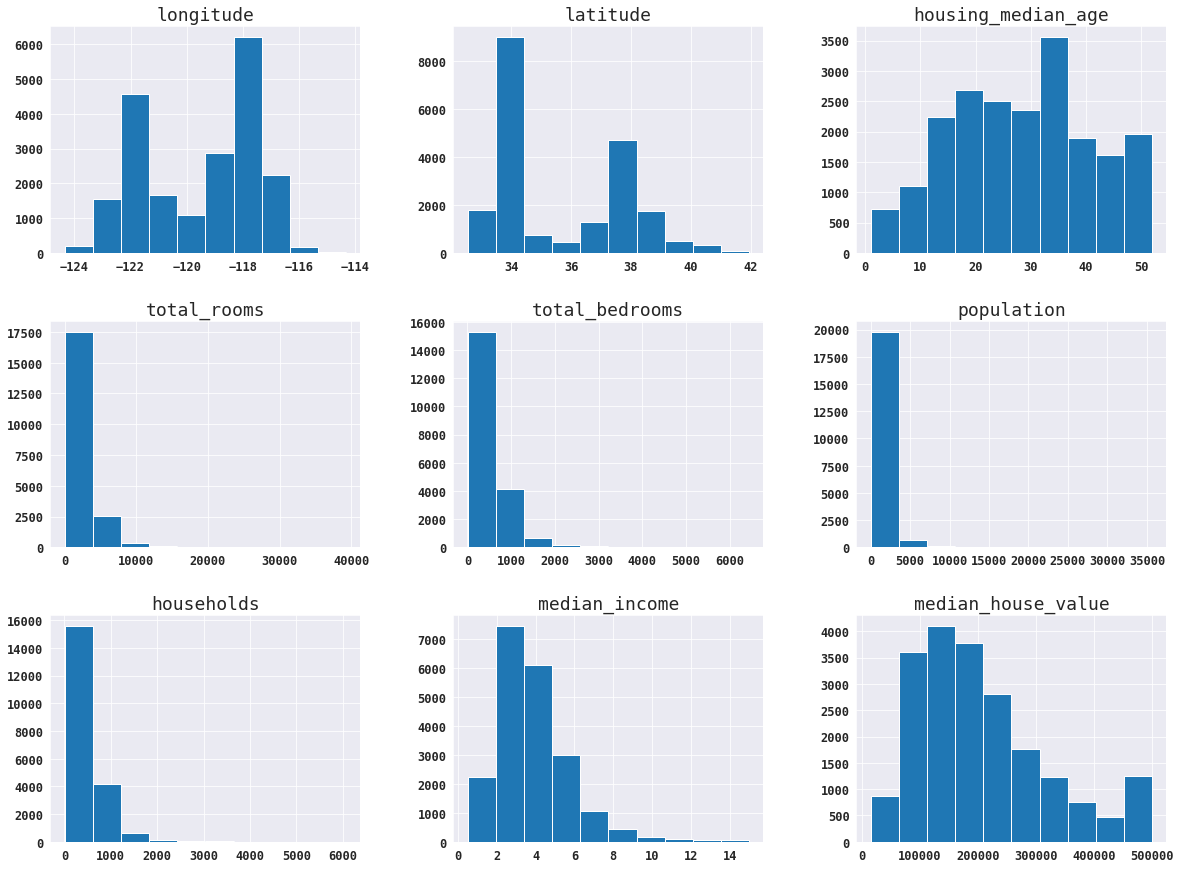

In [45]:
## some visualisation plots rectifying
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
mpl.rc('lines',linewidth=5,c='black')
mpl.rc('title',)
font = {'family' : 'monospace',
          'weight' : 'bold',
          'size'   : 15}
mpl.rc('font', **font)

### plotting histogram 
df.hist(bins=10,figssnsize=(20,15))

/home/dhia/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/dhia/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/home/dhia/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/dhia/anaconda3/lib/python3.7/sit

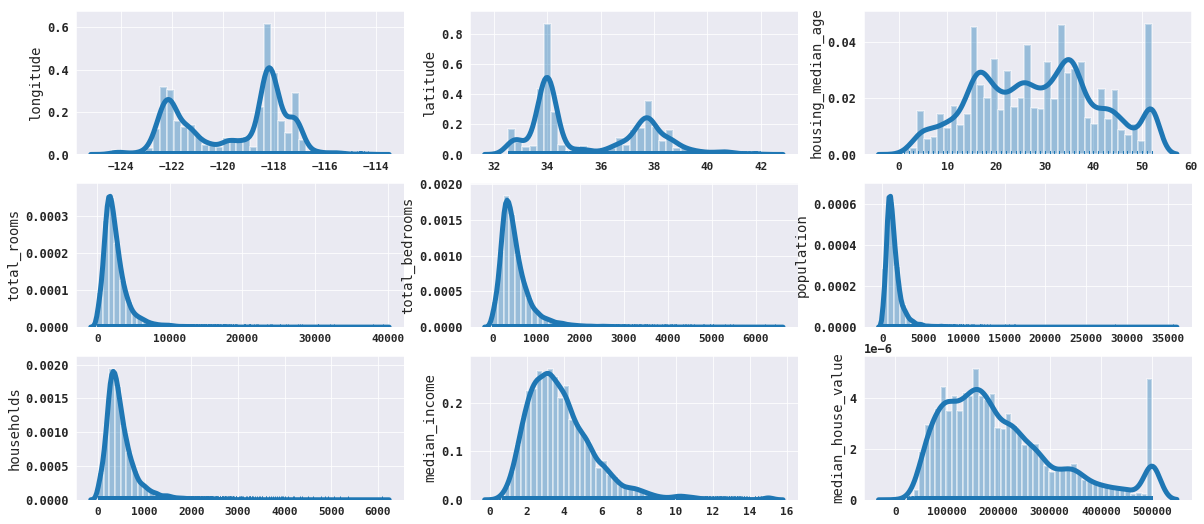

<Figure size 1440x648 with 0 Axes>

In [46]:
font = {'family' : 'monospace',
          'weight' : 'bold',
          'size'   : 15}
mpl.rc('font', **font)
mpl.rc('axes', labelsize=11)
mpl.rc('xtick', labelsize=11)
mpl.rc('ytick', labelsize=12)
mpl.rc('lines',linewidth=15,c='grey')
# plot feature's histtplot
def graphe(feature):
    with sns.axes_style('darkgrid'):
        ax=sns.distplot(x=df[feature],hist=True,rug=True, hist_kws={"linewidth": 2,"edgecolor":'w'},kde_kws={'linewidth':5})
        plt.ylabel(feature,fontsize=14)
        plt.xlabel(xlabel=None)
        plt.grid(b=True)
features=df.columns.tolist()
plt.rcParams["figure.figsize"] = (20,9)

for i in range(1,10):
    plt.subplot(3,3,i)
    graphe(features[i-1])
plt.figure(facecolor='grey',edgecolor='black')
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,wspace=13,
    hspace=18)


Text(0.5, 1.0, 'Boxplot to detect outliers')

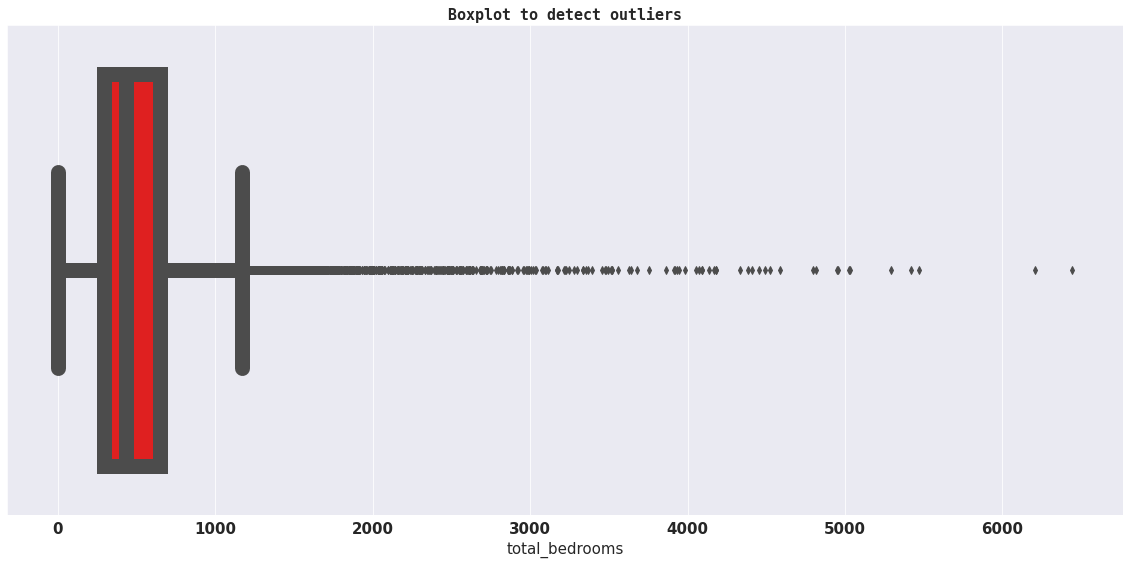

In [247]:
sns.set_style('darkgrid')
sns.boxplot(df['total_bedrooms'],color='red',data=df)
plt.rcParams["figure.figsize"] = (20,5)
plt.xticks(fontsize=15)
plt.xlabel("off")
plt.title("Boxplot to detect outliers",fontdict={'family' : 'monospace',
          'weight' : 'bold',
          'size'   : 15})

In [48]:
np.shape(df)[0]

20640

- **Let's prepare the test set and put it aside** :


- **first challenge**:
    - **data snooping bias: the test set's instances should be randomly chosen:(typically 20%):
        ( we wil create a function that does the split work)**:

In [79]:
def split_train_test (df,test_ratio):
    
        shuffled_indexes=np.random.permutation(np.shape(df)[0])
        len_test_set=int(len(df)*test_ratio)
        test_set=df.iloc[shuffled_indexes[:len_test_set]]
        train_test=df.iloc[shuffled_indexes[len_test_set:]]
        return test_set,train_test
    
test_set,train_set=split_train_test(df,0.2)
test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20512,-121.55,38.59,36.0,435.0,95.0,285.0,90.0,1.2292,69600.0,INLAND
15568,-117.04,33.09,16.0,4677.0,581.0,1902.0,566.0,6.1834,335600.0,<1H OCEAN
4047,-118.51,34.14,28.0,6748.0,904.0,2431.0,876.0,12.8879,500001.0,<1H OCEAN
18127,-122.02,37.34,30.0,1036.0,151.0,467.0,156.0,6.4480,360600.0,<1H OCEAN
3548,-118.61,34.25,16.0,8295.0,1506.0,3903.0,1451.0,5.5111,276600.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
17166,-122.22,37.40,32.0,2297.0,287.0,814.0,283.0,15.0001,500001.0,NEAR OCEAN
8315,-118.33,33.34,52.0,2359.0,591.0,1100.0,431.0,2.8333,414700.0,ISLAND
3076,-119.23,35.74,16.0,2275.0,659.0,1914.0,614.0,2.0330,68400.0,INLAND
10738,-117.91,33.60,37.0,2088.0,510.0,673.0,390.0,5.1048,500001.0,<1H OCEAN


In [80]:
train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
18169,-122.02,37.36,21.0,2471.0,677.0,1486.0,689.0,3.9038,243800.0,<1H OCEAN
9860,-121.86,36.60,21.0,3634.0,1011.0,1985.0,917.0,2.9085,156300.0,<1H OCEAN
17198,-119.75,34.45,6.0,2864.0,NaN,1404.0,603.0,5.5073,263800.0,NEAR OCEAN
1217,-120.90,38.20,16.0,3120.0,641.0,1319.0,526.0,2.0472,93200.0,INLAND
5853,-118.32,34.17,47.0,2589.0,465.0,1284.0,485.0,5.1008,247100.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
20381,-118.83,34.14,16.0,1956.0,312.0,671.0,319.0,6.4001,321800.0,NEAR OCEAN
123,-122.24,37.84,52.0,3529.0,574.0,1177.0,555.0,5.1773,389500.0,NEAR BAY
17789,-121.83,37.35,31.0,2914.0,715.0,3547.0,645.0,3.7143,178600.0,<1H OCEAN
18814,-121.45,41.04,33.0,2029.0,378.0,936.0,343.0,2.6700,77500.0,INLAND


- **second challenge: if you run again the function, we'll have new test_set! we add np.seed(42) to keep this new one allways**


In [81]:
np.random.seed(42) # so we'll have the same shuffled_indices
def split_train_test (df,test_ratio):
    
        shuffled_indexes=np.random.permutation(np.shape(df)[0])
        len_test_set=int(len(df)*test_ratio)
        test_set=df.iloc[shuffled_indexes[:len_test_set]]
        train_test=df.iloc[shuffled_indexes[len_test_set:]]
        return test_set,train_test
    
test_set,train_set=split_train_test(df,0.2)
test_set=test_set.reset_index()
test_set

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
1,3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
2,15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
3,20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
4,9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...,...
4123,15362,-117.22,33.36,16.0,3165.0,482.0,1351.0,452.0,4.6050,263300.0,<1H OCEAN
4124,16623,-120.83,35.36,28.0,4323.0,886.0,1650.0,705.0,2.7266,266800.0,NEAR OCEAN
4125,18086,-122.05,37.31,25.0,4111.0,538.0,1585.0,568.0,9.2298,500001.0,<1H OCEAN
4126,2144,-119.76,36.77,36.0,2507.0,466.0,1227.0,474.0,2.7850,72300.0,INLAND


- **next challenge: test_set wil change again if we fetch an updated dataset:
   one solution is to use the instances's identifier(rows_num) and make sure that row_num won't change(added_data in the bottom of df,no deleted rows etc...)**

In [82]:

def split_train_test(df,test_ratio,ids):
    L=[e for e in range(len(df)) if not(e in ids)]
    indices=[]
    limit=len(ids)
    indices=ids
    for e in L:
     indices.append(e)
                      
    return df.iloc[indices[:limit]],df.iloc[indices[limit:]],indices
test_set_fixed,train_test_fixed,haho=split_train_test(df,0.2,test_set["index"].to_list())
test_set_fixed

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
15362,-117.22,33.36,16.0,3165.0,482.0,1351.0,452.0,4.6050,263300.0,<1H OCEAN
16623,-120.83,35.36,28.0,4323.0,886.0,1650.0,705.0,2.7266,266800.0,NEAR OCEAN
18086,-122.05,37.31,25.0,4111.0,538.0,1585.0,568.0,9.2298,500001.0,<1H OCEAN
2144,-119.76,36.77,36.0,2507.0,466.0,1227.0,474.0,2.7850,72300.0,INLAND


**sklearn provides a great to do that and garantie a random generator seed to fix the data set
you can pass it multiple datasetswith an identical number of rows, and it will split them on the same indices (this is very useful, for example, if you have a separate DataFrame for labels)**

In [85]:

from sklearn.model_selection import train_test_split
training_set,testing_set=train_test_split(df,test_size=0.2,random_state=42)
testing_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND,2
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND,2
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY,3
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN,4
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN,3
...,...,...,...,...,...,...,...,...,...,...,...
15362,-117.22,33.36,16.0,3165.0,482.0,1351.0,452.0,4.6050,263300.0,<1H OCEAN,4
16623,-120.83,35.36,28.0,4323.0,886.0,1650.0,705.0,2.7266,266800.0,NEAR OCEAN,2
18086,-122.05,37.31,25.0,4111.0,538.0,1585.0,568.0,9.2298,500001.0,<1H OCEAN,5
2144,-119.76,36.77,36.0,2507.0,466.0,1227.0,474.0,2.7850,72300.0,INLAND,2


- **we have considered purely random sampling methods. This is generally fine if
your dataset is large enough (especially relative to the number of attributes), but if it
is not, you run the risk of introducing a significant sampling bias**
-**so now we have to make sure that our test set is representative of the whole dataset: stratified_sampling(56%men,44%women etc...) the population is divided into homogeneous subgroups called strata,
and the right number of instances is sampled from each stratum to guarantee that the
test set is representative of the overall population**
-**If they used purely random sam‐pling, there would be about 12% chance of sampling a skewed test set with either lessthan 49% female or more than 54% female. Either way, the survey results would be
significantly biased**
-**Suppose you chatted with experts who told you that the median income is a very
important attribute to predict median housing prices. You may want to ensure that
the test set is representative of the various categories of incomes in the whole dataset**

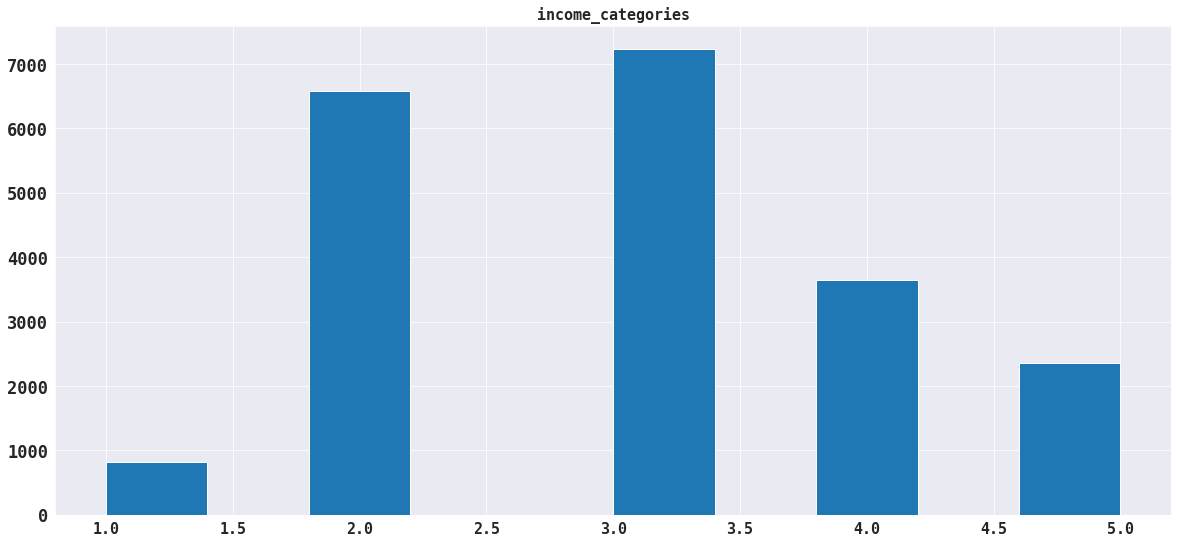

In [84]:

font = {'family' : 'monospace',
          'weight' : 'bold',
          'size'   : 15}
mpl.rc('font', **font)
mpl.rc('axes', labelsize=15)
mpl.rc('xtick', labelsize=15)
mpl.rc('ytick', labelsize=17)
mpl.rc('lines',linewidth=15,c='black')
# categorizing the median income feature:
df["income_cat"]=pd.cut(df["median_income"],bins=[0,1.5,3,4.5,6,np.inf],labels=[1,2,3,4,5])
df['income_cat'].hist()
plt.title("income_categories",font)
plt.rcParams["figure.figsize"] = (20,9)


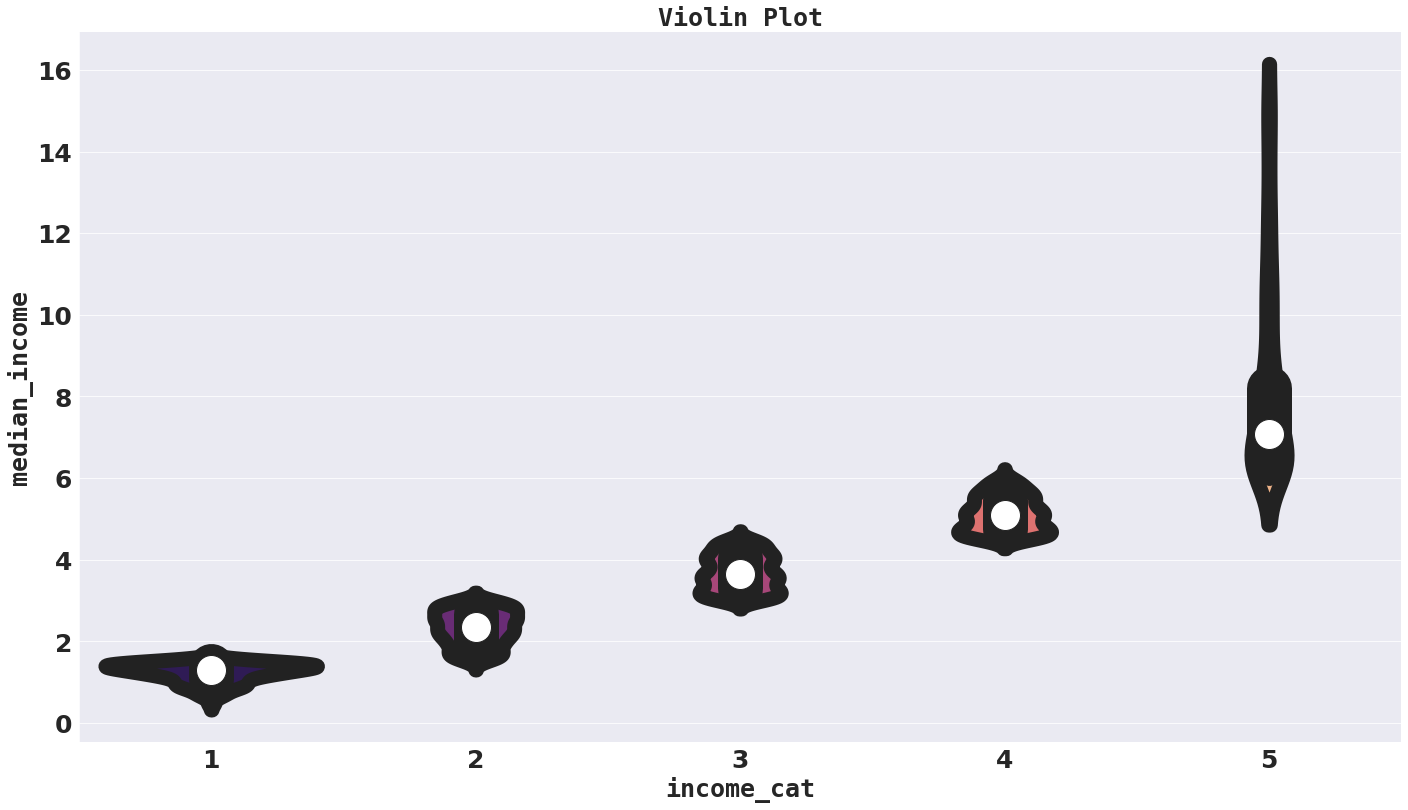

In [265]:
sns.catplot(x='income_cat',y='median_income',data=testing_set,kind='violin',height=10,
    aspect=10,
    orient=None,
    palette="magma")
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel('income_cat',fontsize=25,fontdict={'family' : 'monospace',
          'weight' : 'bold',
          'size'   : 25})
plt.ylabel('median_income',fontsize=25,fontdict={'family' : 'monospace',
          'weight' : 'bold',
          'size'   : 25})
plt.title("Violin Plot",fontdict={'family' : 'monospace',
          'weight' : 'bold',
          'size'   : 25})
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5,forward=True)
plt.show()


(-0.5, 854.5, 887.5, -0.5)

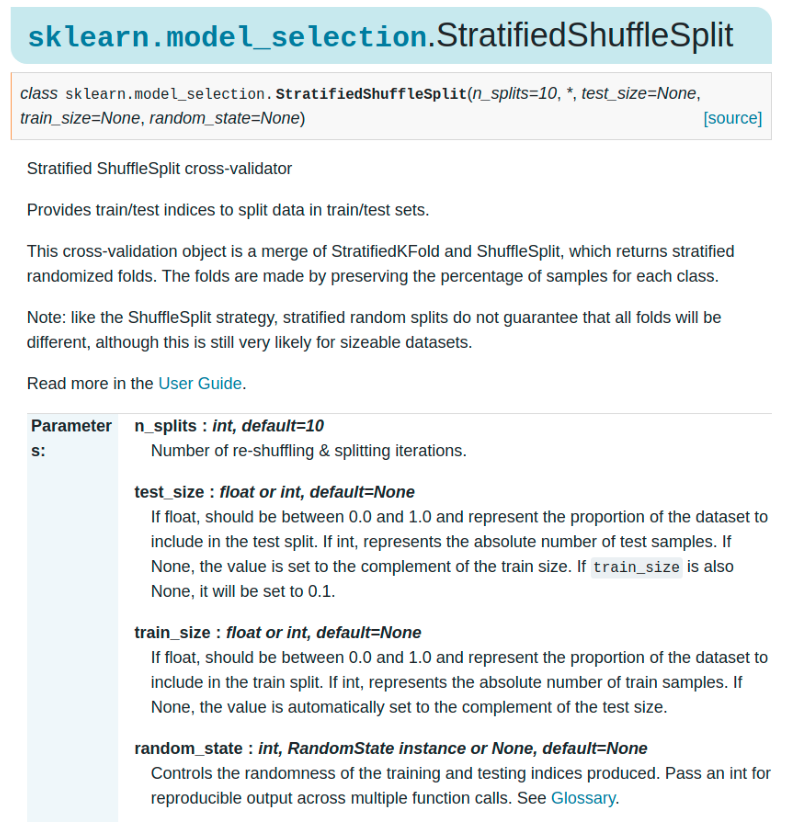

In [244]:
# ready now to do stratified sampling:
#some documentation:

from PIL import Image
doc_photo=Image.open('/home/dhia/Pictures/doc.png')
plt.figure(figsize=(20,15))
plt.imshow(doc_photo)
plt.axis("off")

In [86]:
from sklearn.model_selection import StratifiedShuffleSplit
splitting=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index, test_index in splitting.split(df,df["income_cat"]):
 strat_train_set = df.loc[train_index]
 strat_test_set = df.loc[test_index]

<Figure size 1440x2160 with 0 Axes>

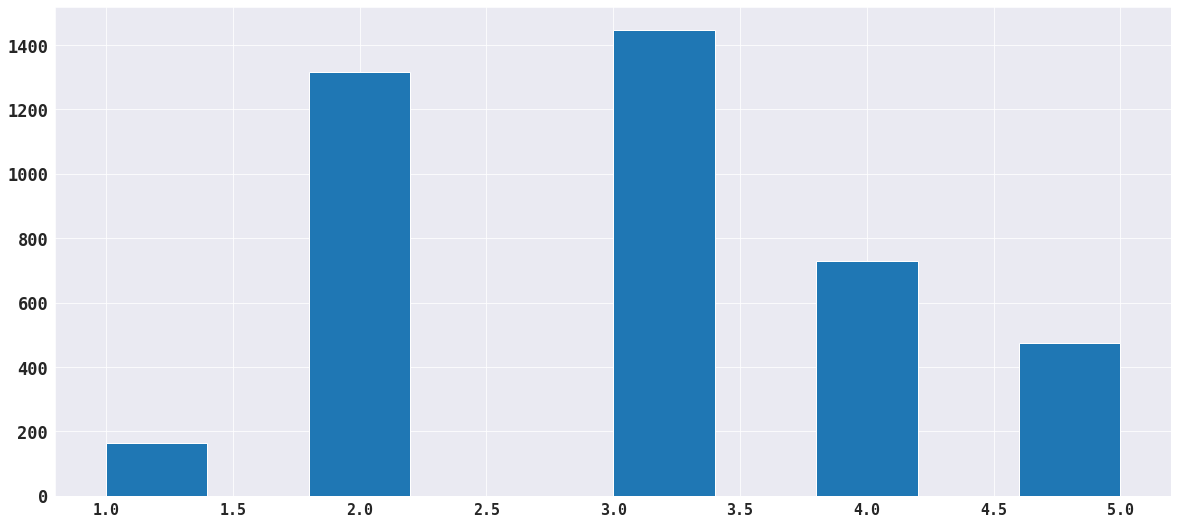

<Figure size 1440x2160 with 0 Axes>

In [61]:
font = {'family' : 'monospace',
          'weight' : 'bold',
          'size'   : 15}
mpl.rc('font', **font)
mpl.rc('axes', labelsize=15)
mpl.rc('xtick', labelsize=15)
mpl.rc('ytick', labelsize=17)
mpl.rc('lines',linewidth=15,c='black')
strat_test_set["income_cat"].hist(stacked=True)
plt.figure(figsize=(20,30))

In [87]:
strat_test_set['income_cat'].value_counts()/len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [88]:
def props(df):
    return df["income_cat"].value_counts()/len(df)

res_compare=pd.DataFrame({
    "Over_whole_DataFrame":props(df),
    "Random_split":props(testing_set),
    "stratified_split":props(strat_test_set)
}).sort_index()
res_compare['Rand_error']=((res_compare['Random_split']-res_compare['Over_whole_DataFrame'])/res_compare['Over_whole_DataFrame'])*100
res_compare['Strat_error']=((res_compare['stratified_split']-res_compare['Over_whole_DataFrame'])/res_compare['Over_whole_DataFrame'])*100
res_compare

,Over_whole_DataFrame,Random_split,stratified_split,Rand_error,Strat_error
1,0.039826,0.040213,0.039729,0.973236,-0.243309
2,0.318847,0.324370,0.318798,1.732260,-0.015195
3,0.350581,0.358527,0.350533,2.266446,-0.013820
4,0.176308,0.167393,0.176357,-5.056334,0.027480
5,0.114438,0.109496,0.114583,-4.318374,0.127011


In [66]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

## Visualisation and insights: More data explatory 

-**First, make sure you have put the test set aside and you are only exploring the training set. Also, 
if the training set is very large,you may want to sample an exploration set
to make manipulations easy and fast. In our case, the set is quite small so you can
just work directly on the full set. Let’s create a copy so you can play with it without
harming the training set:**

In [89]:

df_exploratory=strat_train_set.copy()


#### some exploratory insights:

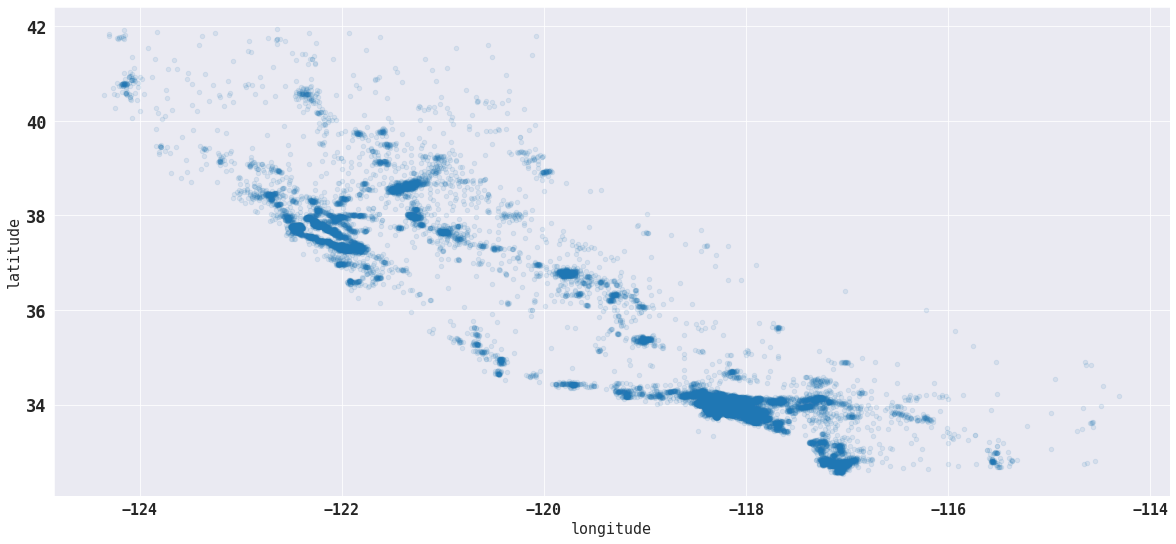

In [90]:
df_exploratory.plot(kind='scatter',x='longitude',y='latitude',grid=True,alpha=0.1)
plt.rcParams["figure.figsize"] = (15,9)


In [169]:
plt.rcParams["figure.figsize"] = (20,3)

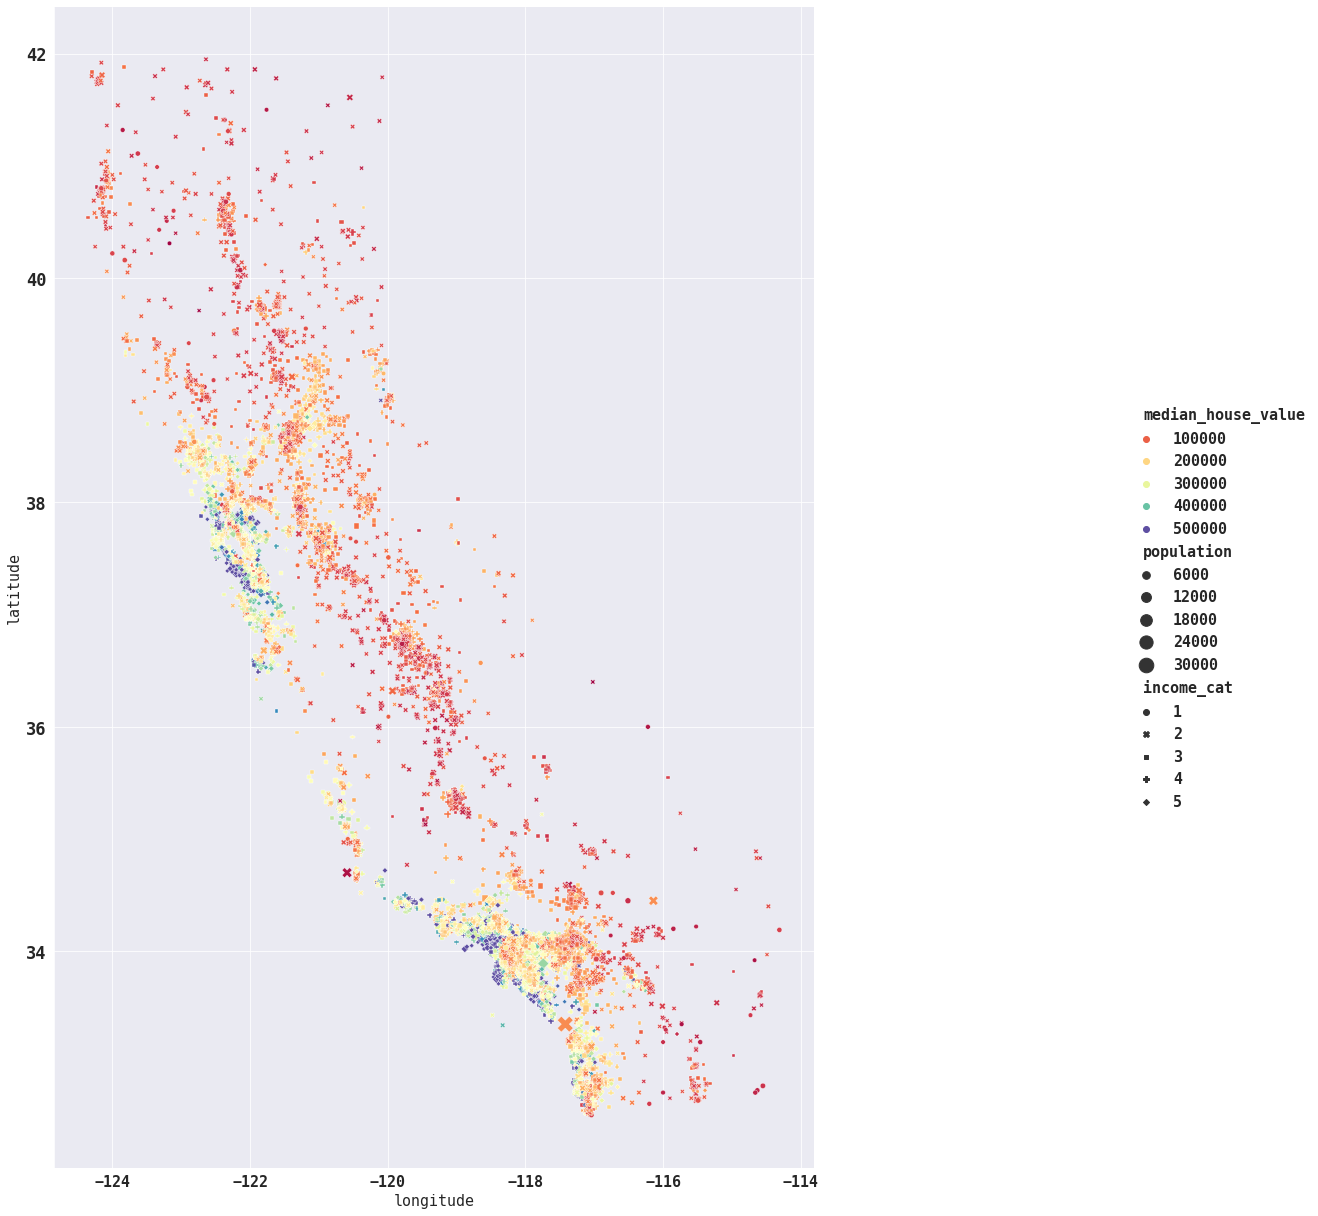

In [175]:
sns.color_palette("Spectral", as_cmap=True)
sns.relplot('longitude','latitude',data=df_exploratory,style='income_cat',palette='Spectral',hue='median_house_value',size='population',sizes=(20,250))#last one to better visualisation
fig = plt.gcf()
fig.set_size_inches(20, 19,forward=True)

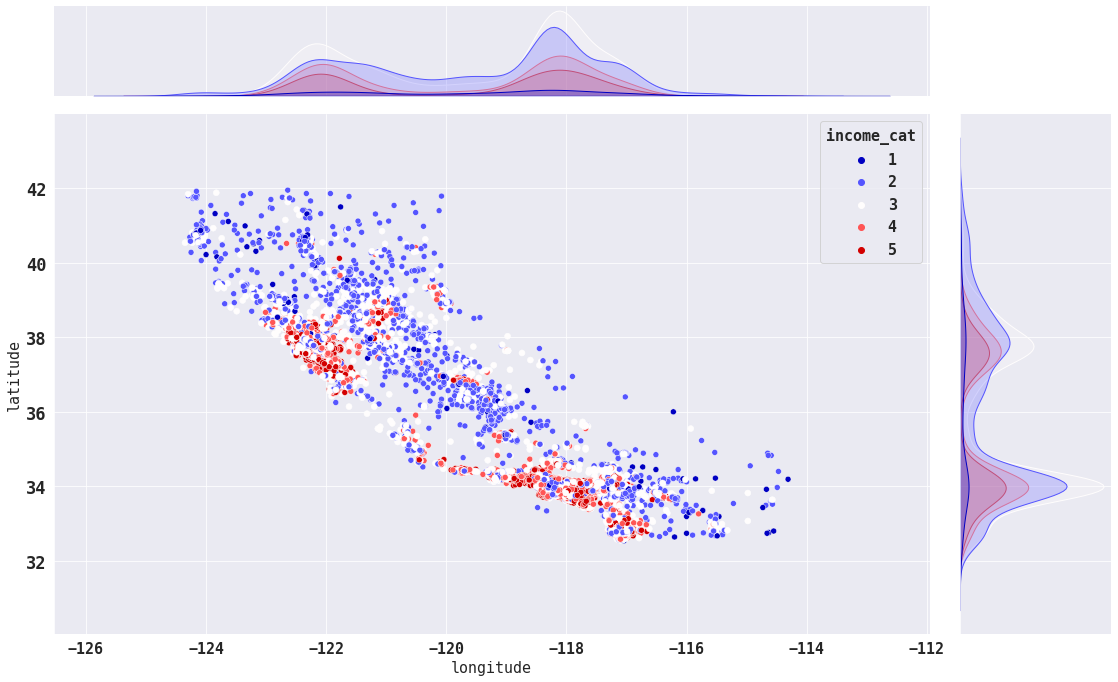

In [172]:
sns.jointplot('longitude','latitude',data=df_exploratory,kind='scatter',hue='income_cat',palette='seismic' )
# kind='hex' 
### the rectangles show the density of data in that zone 
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5,forward=True)

In [96]:
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join('/home/dhia/Pictures/', fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

#### Feature Correlation :

In [97]:
# let's create our correlation matrix(10x10):
# First method:
matrix_corr=df_exploratory.corr()
matrix_corr#is a dataFrame type

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000


In [98]:
pd.DataFrame(matrix_corr['median_house_value'].sort_values(ascending=False))


,median_house_value
median_house_value,1.000000
median_income,0.687160
total_rooms,0.135097
housing_median_age,0.114110
households,0.064506
total_bedrooms,0.047689
population,-0.026920
longitude,-0.047432
latitude,-0.142724


**1.The correlation coefficient only measures linear correlations (“if x
#goes up, then y generally goes up/down”). It may completely miss
#out on nonlinear relationships (e.g., “if x is close to zero then y generally goes up”).**

Text(0, 0.5, '')

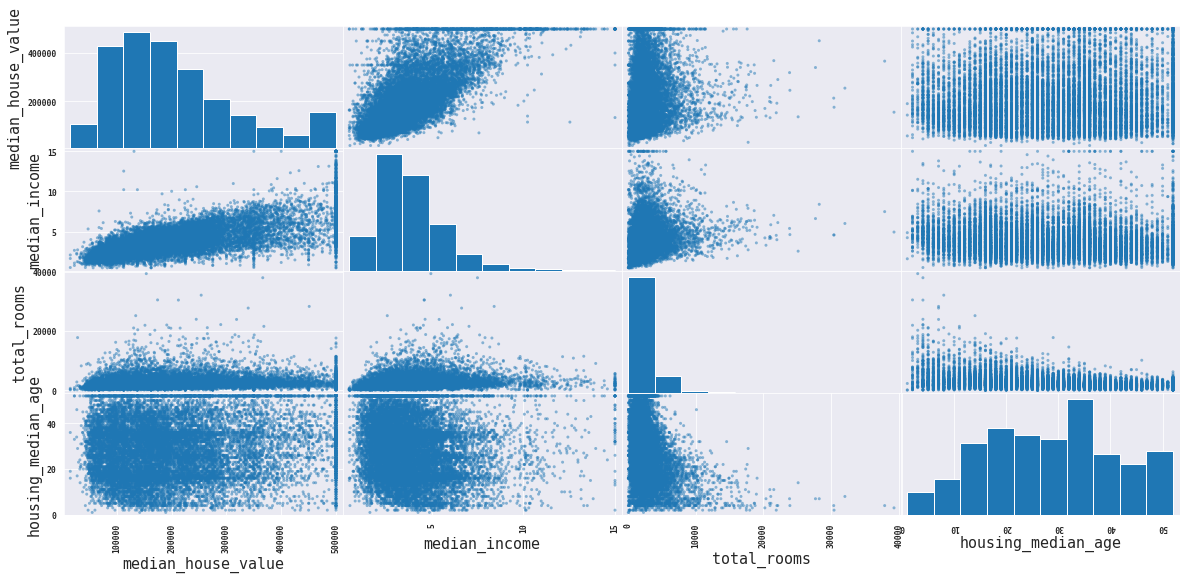

In [107]:
#second method:
features=["median_house_value", "median_income", "total_rooms",
"housing_median_age"]
pd.plotting.scatter_matrix(df_exploratory[features],grid=True)#diagonal='hist' or 'kde'
plt.yticks(fontsize=50,ticks=[])
plt.xticks(rotation=180)
plt.rcParams["figure.figsize"] = (20,9)
plt.ylabel(ylabel=None,fontsize=5)


<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

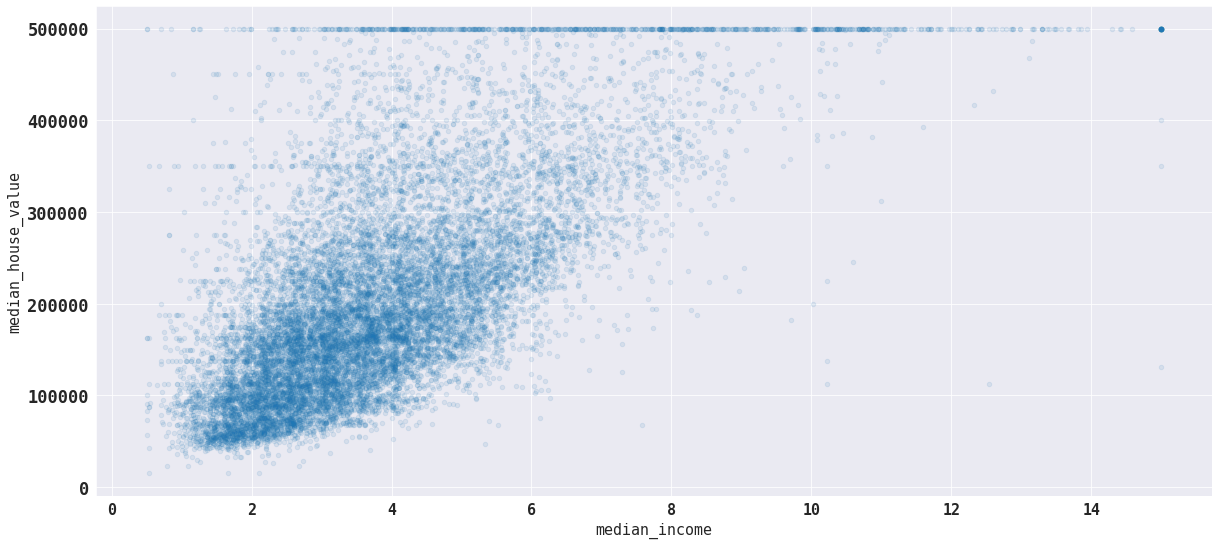

In [108]:
df_exploratory.plot(kind="scatter", x="median_income", y="median_house_value",
alpha=0.1)


**-This plot reveals a few things. First, the correlation is indeed very strong; you can
clearly see the upward trend and the points are not too dispersed. Second, the price
cap that we noticed earlier is clearly visible as a horizontal line at 500,000. But this
plot reveals other less obvious straight lines: a horizontal line around 450,000,
another around 350,000, perhaps one around 280,000, and a few more below that.
You may want to try removing the corresponding districts to prevent your algorithms
from learning to reproduce these data quirks.**

#### Feature combination

**hopefully the previous sections gave us an idea of a few ways we can explore the
data and gain insights. You identified a few data quirks that you may want to clean up
before feeding the data to a Machine Learning algorithm, and you found interesting
correlations between attributes, in particular with the target attribute. You also
noticed that some attributes have a tail-heavy distribution, so you may want to trans‐
form them (e.g., by computing their logarithm). Of course, your mileage will vary
considerably with each project, but the general ideas are similar.
One last thing you may want to do before actually preparing the data for Machine
Learning algorithms is to try out various attribute combinations.**

In [109]:

df_exploratory["rooms_per_household"] = df_exploratory["total_rooms"]/df_exploratory["households"]
df_exploratory["bedrooms_per_room"] = df_exploratory["total_bedrooms"]/df_exploratory["total_rooms"]
df_exploratory["population_per_household"]=df_exploratory["population"]/df_exploratory["households"]
df_exploratory

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat,rooms_per_household,bedrooms_per_room,population_per_household
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,2,4.625369,0.223852,2.094395
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,5,6.008850,0.159057,2.707965
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,2,4.225108,0.241291,2.025974
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,2,5.232295,0.200866,4.135977
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,3,4.505810,0.231341,3.047847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,240200.0,INLAND,4,6.052381,0.185681,2.728571
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,113000.0,INLAND,2,4.635659,0.245819,4.077519
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,97800.0,INLAND,3,6.346405,0.179609,2.742484
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,225900.0,<1H OCEAN,3,5.505618,0.193878,3.808989


In [110]:
pd.DataFrame(df_exploratory.corr().median_house_value.sort_values(ascending=False))

,median_house_value
median_house_value,1.000000
median_income,0.687160
rooms_per_household,0.146285
total_rooms,0.135097
housing_median_age,0.114110
households,0.064506
total_bedrooms,0.047689
population_per_household,-0.021985
population,-0.026920
longitude,-0.047432


**not bad , new features are more correlated to the target than other old ones(see ML's main challenge)**

  **-Feature selection: selecting the most useful features to train on among existing features.**
  
  **-Feature extraction: combining existing features to produce a more useful one (as
       we saw earlier, dimensionality reduction algorithms can help Creating new features by gathering new data.**


**this is an iterative process: once you get a prototype up
and running, you can analyze its output to gain more insights and come back to thisexploration step.**


### Prepare the Data for Machine Learning Algorithms

#### 1. Data cleaning

In [111]:
#Most Machine Learning algorithms cannot work with missing features, so let’s create
#a few functions to take care of them. You noticed earlier that the total_bedrooms
#attribute has some missing values, so let’s fix this. You have three options:

# 1• Get rid of the corresponding districts: housing.dropna(subset=["total_bedrooms"])

# 2• Get rid of the whole attribute:  housing.drop("total_bedrooms", axis=1)

# 3•Set the values to some value (zero, the mean, the median, etc.):
#median = housing["total_bedrooms"].median() # option 3
#housing["total_bedrooms"].fillna(median, inplace=True)
df_cleaned=strat_train_set.drop('median_house_value',axis=1)
target_df=strat_train_set['median_house_value']

In [112]:
#let's show districts having missing_values:
missing_districts=df_cleaned[df_cleaned.isnull().any(axis=1)].head()
missing_districts

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
4629,-118.30,34.07,18.0,3759.0,NaN,3296.0,1462.0,2.2708,<1H OCEAN,2
6068,-117.86,34.01,16.0,4632.0,NaN,3038.0,727.0,5.1762,<1H OCEAN,4
17923,-121.97,37.35,30.0,1955.0,NaN,999.0,386.0,4.6328,<1H OCEAN,4
13656,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,INLAND,2
19252,-122.79,38.48,7.0,6837.0,NaN,3468.0,1405.0,3.1662,<1H OCEAN,3


In [113]:
#option 3:
medians=df_cleaned.median()
median=df_cleaned['total_bedrooms'].median()
median

433.0

In [114]:
df_cleaned['total_bedrooms'].fillna(median,inplace=True)
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           16512 non-null  float64 
 1   latitude            16512 non-null  float64 
 2   housing_median_age  16512 non-null  float64 
 3   total_rooms         16512 non-null  float64 
 4   total_bedrooms      16512 non-null  float64 
 5   population          16512 non-null  float64 
 6   households          16512 non-null  float64 
 7   median_income       16512 non-null  float64 
 8   ocean_proximity     16512 non-null  object  
 9   income_cat          16512 non-null  category
dtypes: category(1), float64(8), object(1)
memory usage: 1.3+ MB


In [115]:
# filling nan using sklearn :
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")
#imputer works only on numerical features
num_cleaned_df=df_cleaned.drop('ocean_proximity',axis=1) # or housing_num = housing.select_dtypes(include=[np.number])
imputer.fit(num_cleaned_df)
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409,    3.    ])

In [116]:
X=imputer.transform(num_cleaned_df)
cleaned_df=pd.DataFrame(X,columns=num_cleaned_df.columns,index=num_cleaned_df.index)
cleaned_df.drop('income_cat',axis=1,inplace=True)
cleaned_df.info()
# cleaned ;) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


#### 2. Dealing with categorical and text features

In [117]:
# converting to numbers since Most Machine Learning algorithms prefer to work with numbers
cat_feature=df_cleaned[['ocean_proximity']]
cat_feature.head()

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN


In [118]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder=OrdinalEncoder()
cat_feature_encoded=ordinal_encoder.fit_transform(cat_feature)
cat_feature_encoded[:5]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.]])

In [330]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [119]:
#One issue with this representation is that ML algorithms will assume that two nearby
#values are more similar than two distant values. This may be fine in some cases (e.g.,
#for ordered categories such as “bad”, “average”, “good”, “excellent”), but it is obviously
#not the case for the ocean_proximity column (for example, categories 0 and 4 are
#clearly more similar than categories 0 and 1).

In [120]:
#One Hot Encoder is the solution: eate one binary attribute per category: one attribute equal to 1 when the category
# is “<1H OCEAN” (and 0 otherwise)
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder=OneHotEncoder()
onehot_cat_feature=one_hot_encoder.fit_transform(cat_feature)
onehot_cat_feature# a sparse matrix so let's use toarray() method
onehot_cat_feature.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [121]:
one_hot_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [122]:
# If a categorical attribute has a large number of possible categories
#(e.g., country code, profession, species, etc.), then one-hot encod‐
#ing will result in a large number of input features. This may slow
#down training and degrade performance.

In [133]:
# prepare your own cleanup transformer with oriented_objected_method 
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
 def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
  self.add_bedrooms_per_room = add_bedrooms_per_room
 def fit(self, X, y=None):
    return self # nothing else to do
 def transform(self, X, y=None):
   rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
   population_per_household = X[:, population_ix] / X[:, households_ix]
   if self.add_bedrooms_per_room:
     bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
     return np.c_[X, rooms_per_household, population_per_household,
           bedrooms_per_room]
   else:
     return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
cleaned_df_extra_attribs = attr_adder.transform(cleaned_df.values)
#More generally, you can add a hyperparameter
#to gate any data preparation step that you are not 100% sure about. The more you
#automate these data preparation steps, the more combinations you can automatically
#try out, making it much more likely that you will find a great combination (and sav‐
#ing you a lot of time)

In [134]:
col_names = "total_rooms", "total_bedrooms", "population", "households"
rooms_ix, bedrooms_ix, population_ix, households_ix = [
    cleaned_df.columns.get_loc(c) for c in col_names] # get the column indices

In [136]:
cleaned_df_extra_attribs = pd.DataFrame(
    cleaned_df_extra_attribs,
    columns=list(cleaned_df.columns)+["rooms_per_household", "population_per_household"],
    index=cleaned_df.index)
cleaned_df_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,4.625369,2.094395
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,6.008850,2.707965
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,4.225108,2.025974
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,5.232295,4.135977
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,4.505810,3.047847


#### 3; Feature scaling:

In [137]:
#With few exceptions, Machine Learning algorithms don’t perform well when
#the input numerical attributes have very different scales. This is the case for the housing data:
#the total number of rooms ranges from about 6 to 39,320,

#There are two common ways to get all attributes to have the same scale: 

#1.min-max scaling (generally for neural networks:values are shifted and rescaled so that they end up ranging from 0 to 1 with sklearn.MinMaxScaler)
#2.standardization (first it subtracts the mean value (so standardized values always have a zero mean),
#and then it divides by the standard deviation so that the resulting distribution has unit variance using 
#sklearn.StanderScaler)(much less affected by outliers)


##### 4.Preparing our transformations pipelines

(-0.5, 867.5, 780.5, -0.5)

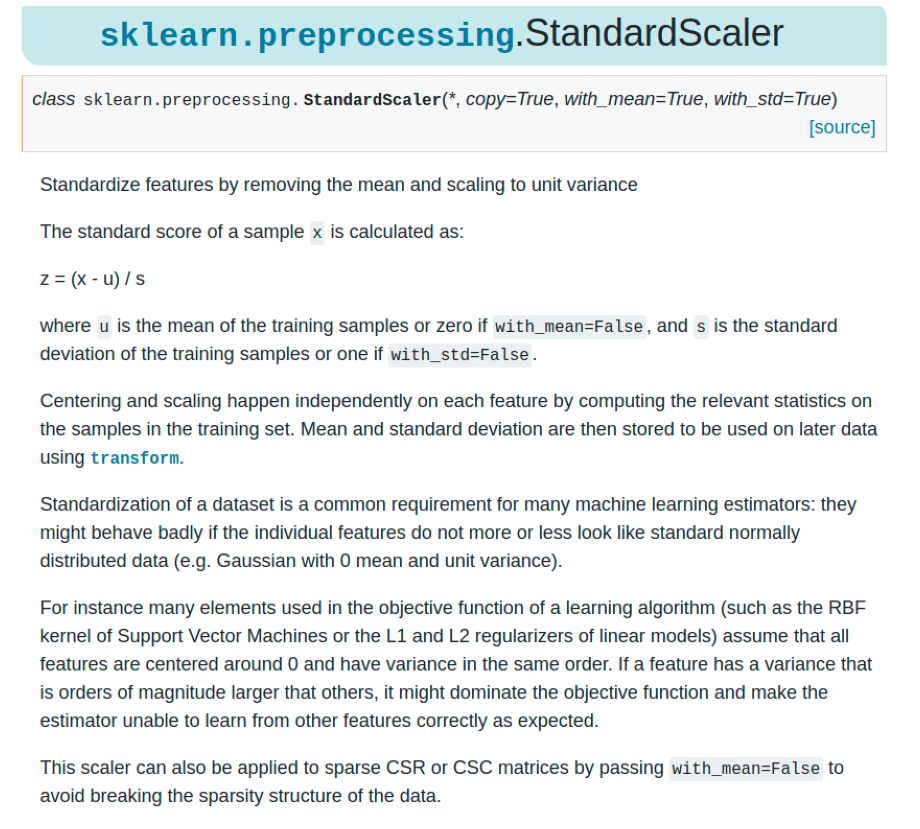

In [245]:
from PIL import Image
doc_photo=Image.open('/home/dhia/Pictures/scaler.png')
plt.figure(figsize=(20,15))
plt.imshow(doc_photo)
plt.axis("off")

In [139]:
# Pipeline input is a list of tuples
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline=Pipeline([("inputer",SimpleImputer(strategy="median")),
                       ('attribs_adder', CombinedAttributesAdder()),
                       ("std_scaler",StandardScaler())]) # all transformator must have fit_transform method
numerical_df=num_pipeline.fit_transform(cleaned_df)
numerical_df

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

In [155]:
all_df=cleaned_df.copy()

all_df["income_cat"]=pd.cut(all_df["median_income"],bins=[0,1.5,3,4.5,6,np.inf],labels=[1,2,3,4,5])
all_df['ocean_proximity']=df_cleaned[['ocean_proximity']]
all_df
# take a look at FeatureUnion which can also apply different transformers and concatenate their outputs

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,2,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,5,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,2,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,2,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,3,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,4,INLAND
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,2,INLAND
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,3,INLAND
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,3,<1H OCEAN


In [163]:
#So far, we have handled the categorical columns and the numerical columns separately.
#It would be more convenient to have a single transformer able to handle all columns,
#applying the appropriate transformations to each column.

cat_attribs = ["ocean_proximity"]
from sklearn.compose import ColumnTransformer
full_pipeline=ColumnTransformer([("num",num_pipeline,list(cleaned_df)),
                                ("cat", OneHotEncoder(), cat_attribs)])
df_prepared=full_pipeline.fit_transform(all_df)
df_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

### old version of ColumnTransformer:

**For reference, here is the old solution based on a DataFrameSelector transformer (to just select a subset of the Pandas DataFrame columns), and a FeatureUnion**

**Try it during reviewing this project**


### Select and Train a model

At last! You framed the problem, you got the data and explored it, you sampled a
training set and a test set, and you wrote transformation pipelines to clean up and
prepare your data for Machine Learning algorithms automatically. You are now ready
to select and train a Machine Learning model.

In [176]:
# all df 
#df_prepared (preprocessed training set withoug the target column)
#target_df= serie containing label column

#### linear regression model

In [179]:
from sklearn.linear_model import LinearRegression
lin_reg_model=LinearRegression()
lin_reg_model.fit(df_prepared,target_df)
predictions=lin_reg_model.predict(df_prepared)

from sklearn.metrics import mean_squared_error

mse=mean_squared_error(target_df,predictions)
rmse=np.sqrt(mse)
rmse


68628.19819848923

Clearly not a great score: 

most districts’median_housing_values range between 120,000 and 265,000 dollars so a typical prediction error of $68,628 is not very satisfying. This is an example of a model underfitting
the training data. When this happens it can mean that the features do not provideenough information to make good predictions, or that the model is not powerful enough. As we saw in the previous chapter, the main ways to fix underfitting are to:

-**select a more powerful model**

-**to feed the training algorithm with better features**

-**to reduce the constraints on the model.** 

This model is not regularized, so this rulesout the last option. You could try to add more features (e.g., the log of the population), but first let’s try a more complex model to see how it does.

In [186]:
# iloc function 
some_data = all_df.iloc[:5]
some_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,2,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,5,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,2,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,2,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,3,<1H OCEAN


In [194]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
dec_tree_reg=DecisionTreeRegressor()
dec_tree_reg.fit(df_prepared,target_df)
predictions=dec_tree_reg.predict(df_prepared)
dt_mse=mean_squared_error(target_df,predictions)
dt_rmse=np.sqrt(dt_mse)
dt_rmse

0.0

Wait, what!? No error at all? Could this model really be absolutely perfect? Of course,
it is much more likely that the model has badly overfit the data. How can you be sure?
As we saw earlier, you don’t want to touch the test set until you are ready to launch a
model you are confident about, so you need to use part of the training set for training, 
and part for model validation.

#### Better Evaluation with cross validation score

One way to evaluate the Decision Tree model would be to use the train_test_splitfunction to split the training set into a smaller training set and a validation set, then train your models against the smaller training set and evaluate them against the validation set. It’s a bit of work, but nothing too difficult and it would work fairly well.

##### cross validation method :

A great alternative is to use Scikit-Learn’s K-fold cross-validation feature. The following
code randomly splits the training set into 10 distinct subsets called folds, then it
trains and evaluates the Decision Tree model 10 times, picking a different fold for
evaluation every time and training on the other 9 folds. The result is an array containing the 10 evaluation scores


In [196]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(dec_tree_reg,df_prepared,target_df,scoring='neg_mean_squared_error',cv=10)
tree_rmse_scores=np.sqrt(-score)
tree_rmse_scores

array([68904.20081877, 66290.86548064, 71475.77033626, 69071.09799498,
       71464.1630506 , 74312.54599234, 71632.67797679, 70421.33644751,
       77470.31835463, 69767.52855463])

Scikit-Learn’s cross-validation features expect a utility function
(greater is better) rather than a cost function (lower is better), so
the scoring function is actually the opposite of the MSE (i.e., a neg‐
ative value), which is why the preceding code computes -scores
before calculating the square root.

In [206]:
def show_scores(score):
  print("Scores:   \n",score)
  print("Mean:   \n",score.mean())
  print("standard deviation:  \n",score.std())    
show_scores(tree_rmse_scores)   

Scores:   
 [68904.20081877 66290.86548064 71475.77033626 69071.09799498
 71464.1630506  74312.54599234 71632.67797679 70421.33644751
 77470.31835463 69767.52855463]
Mean:   
 71081.05050071537
standard deviation:  
 2928.4329827186807


it seems to perform worse than the Linear Regression model! Notice that cross-validation allows
you to get not only an estimate of the performance of your model, but also a measure
of how precise this estimate is (i.e., its standard deviation). The Decision Tree has a
score of approximately 71,407, generally ±2,439. You would not have this information
if you just used one validation set.

In [210]:
#Let’s compute the same scores for the Linear Regression model just to be sure:
lin_reg_scores=cross_val_score(lin_reg_model,df_prepared,target_df,scoring='neg_mean_squared_error',cv=10)
lin_reg_rmse=np.sqrt(-lin_reg_scores)
show_scores(lin_reg_rmse)

print('\n The Decision Tree model is overfitting so badly that it performs worse than the Linear Regression model')

Scores:   
 [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean:   
 69052.46136345083
standard deviation:  
 2731.674001798348

 The Decision Tree model is overfitting so badly that it performs worse than the Linear Regression model


In [212]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
rndm_forest_reg=RandomForestRegressor()
rndm_forest_reg.fit(df_prepared,target_df)
predictions=rndm_forest_reg.predict(df_prepared)
score=cross_val_score(rndm_forest_reg,df_prepared,target_df,scoring='neg_mean_squared_error',cv=10)
rf_rmse=np.sqrt(-score)
show_scores(rf_rmse)

Scores:   
 [49490.48953502 47393.06498122 49606.5676696  52387.36055474
 49597.11353501 53028.61118607 48792.17743234 47770.24675184
 53029.26457838 49962.07970463]
Mean:   
 50105.69759288527
standard deviation:  
 1942.7195028852643


this is much better: **Random Forests** look very promising. However, note that
the score on the training set is still much lower than on the validation sets, meaning
that the model is still **overfitting** the training set. Possible solutions for overfitting are
**o simplify the model, constrain it (i.e., regularize it), or get a lot more training data.**

However, before you dive much deeper in Random Forests, you should try out many
other models from various categories of Machine Learning algorithms (several Sup‐
port Vector Machines with different kernels, possibly a neural network, etc.), without
spending too much time tweaking the hyperparameters. 

**The goal is to shortlist a few
(two to five) promising models.**

ou should save every model you experiment with, so you can
come back easily to any model you want. Make sure you save both
the hyperparameters and the trained parameters, as well as the
cross-validation scores and perhaps the actual predictions as well.
This will allow you to easily compare scores across model types,
and compare the types of errors they make. You can easily save
Scikit-Learn models by using Python’s pickle module, or using
sklearn.externals.joblib , which is more efficient at serializing
large NumPy arrays:
```python
   from sklearn.externals import joblib
   joblib.dump(my_model, "my_model.pkl")
# and later...
   my_model_loaded = joblib.load("my_model.pkl")
```

In [214]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
svm_model=SVR(kernel='linear')
svm_model.fit(df_prepared,target_df)
predictions=svm_model.predict(df_prepared)
svm_mse=mean_squared_error(target_df,predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

111094.6308539982

In [215]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(svm_model,df_prepared,target_df,scoring='neg_mean_squared_error',cv=10)
svm_rmse=np.sqrt(-score)
show_scores(svm_rmse)

Scores:   
 [105342.09141998 112489.24624123 110092.35042753 113403.22892482
 110638.90119657 115675.8320024  110703.56887243 114476.89008206
 113756.17971227 111520.1120808 ]
Mean:   
 111809.84009600841
standard deviation:  
 2762.393664321567


### hyperparameter tuning-Fine tune the model


Let’s assume that you now have a shortlist of promising models. You now need to
fine-tune them. Let’s look at a few ways you can do that.

One way to do that would be to fiddle with the hyperparameters manually, until you
find a great combination of hyperparameter values. This would be very tedious work,
and you may not have time to explore many combinations.

Instead you should get **Scikit-Learn’s GridSearchCV** to search for you. All you need to
do is tell it which hyperparameters you want it to experiment with, and what values to
try out, and it will evaluate all the possible combinations of hyperparameter values,
using cross-validation



In [232]:
from sklearn.model_selection import GridSearchCV
rndm_forest=RandomForestRegressor()
param_grid=[
{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]
grid_search=GridSearchCV(rndm_forest,param_grid,scoring='neg_mean_squared_error',cv=5,return_train_score=True)
grid_search.fit(df_prepared,target_df)
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [233]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [234]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.249810,0.040603,0.014067,0.001661,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-3.732190e+09,-4.514104e+09,...,-4.057690e+09,3.279548e+08,18,-1.045843e+09,-1.118551e+09,-1.123786e+09,-1.032890e+09,-1.156872e+09,-1.095588e+09,4.792462e+07
1,0.818980,0.050994,0.044598,0.009247,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-2.889996e+09,-3.279706e+09,...,-3.102633e+09,1.795647e+08,11,-5.725276e+08,-6.036871e+08,-5.930507e+08,-5.690690e+08,-6.015020e+08,-5.879673e+08,1.450290e+07
2,2.484314,0.108092,0.124376,0.017407,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.689847e+09,-2.903514e+09,...,-2.805200e+09,1.712107e+08,9,-4.517643e+08,-4.251292e+08,-4.394340e+08,-4.309465e+08,-4.227448e+08,-4.340038e+08,1.058105e+07
3,0.419167,0.017928,0.014738,0.001773,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.380966e+09,-3.794013e+09,...,-3.595287e+09,1.537509e+08,16,-9.738280e+08,-9.846006e+08,-9.498514e+08,-8.954481e+08,-9.736863e+08,-9.554829e+08,3.209871e+07
4,1.412831,0.058675,0.044481,0.004272,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.682705e+09,-2.851907e+09,...,-2.785048e+09,1.191204e+08,8,-5.187149e+08,-5.040136e+08,-5.139749e+08,-5.167336e+08,-4.968921e+08,-5.100658e+08,8.303313e+06
5,4.268542,0.158021,0.121029,0.019135,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.389567e+09,-2.673971e+09,...,-2.571500e+09,1.467847e+08,3,-3.991790e+08,-3.835048e+08,-3.970696e+08,-3.952352e+08,-3.900302e+08,-3.930037e+08,5.634114e+06
6,0.578090,0.029722,0.014116,0.000647,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.312840e+09,-3.526713e+09,...,-3.459358e+09,1.071448e+08,14,-9.033595e+08,-8.864723e+08,-9.548535e+08,-9.057088e+08,-8.873346e+08,-9.075457e+08,2.494597e+07
7,1.848045,0.055023,0.035465,0.000175,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.543161e+09,-2.840132e+09,...,-2.705999e+09,1.585361e+08,6,-5.148750e+08,-5.218362e+08,-4.972908e+08,-4.878255e+08,-5.068516e+08,-5.057358e+08,1.213335e+07
8,5.845616,0.449417,0.108115,0.006365,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.381513e+09,-2.513177e+09,...,-2.489714e+09,1.103958e+08,1,-3.952055e+08,-3.854149e+08,-3.810656e+08,-3.881880e+08,-3.731159e+08,-3.845980e+08,7.353764e+06
9,0.735405,0.044696,0.013579,0.000502,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.333150e+09,-3.500315e+09,...,-3.498689e+09,1.740702e+08,15,-9.152087e+08,-8.654631e+08,-8.825003e+08,-9.320630e+08,-8.878094e+08,-8.966089e+08,2.387255e+07


When you have no idea what value a hyperparameter should have,
a simple approach is to try out consecutive powers of 10 (or a
smaller number if you want a more fine-grained search, as shown
in this example with the n_estimators hyperparameter).
This param_grid tells Scikit-Learn to first evaluate all 3 × 4 = 12 combinations of
n_estimators and max_features hyperparameter values specified in the first dict
(don’t worry about what these hyperparameters mean for now; they will be explained
in Chapter 7), then try all 2 × 3 = 6 combinations of hyperparameter values in the
second dict , but this time with the bootstrap hyperparameter set to False instead of
True (which is the default value for this hyperparameter).
All in all, the grid search will explore 12 + 6 = 18 combinations of RandomForestRe
gressor hyperparameter values, and it will train each model five times (since we are
using five-fold cross validation). In other words, all in all, there will be 18 × 5 = 90
rounds of training! It may take quite a long time, but when it is done you can get the
best combination of parameters like this:
```python
  grid_search.best_params_
```
In this example, we obtain the best solution by setting the max_features hyperpara‐
meter to 8 , and the n_estimators hyperparameter to 30 . The RMSE score for this
combination is 49,682, which is slightly better than the score you got earlier using the
default hyperparameter values (which was 50,182). Congratulations, you have suc‐
cessfully fine-tuned your best model!


Don’t forget that you can treat some of the data preparation steps as
hyperparameters. For example, the grid search will automatically
find out whether or not to add a feature you were not sure about
(e.g., using the add_bedrooms_per_room hyperparameter of your
CombinedAttributesAdder transformer). It may similarly be used
to automatically find the best way to handle outliers, missing fea‐
tures, feature selection, and more.

#### trying RandomizedSearchCV


The grid search approach is fine when you are exploring relatively few combinations,
like in the previous example, but when the hyperparameter search space is large, it is
often preferable to use RandomizedSearchCV instead. This class can be used in much
the same way as the GridSearchCV class, but instead of trying out all possible combi‐
nations, it evaluates a given number of random combinations by selecting a random
value for each hyperparameter at every iteration. This approach has two main benefits:

• If you let the randomized search run for, say, 1,000 iterations, this approach will
explore 1,000 different values for each hyperparameter (instead of just a few values per hyperparameter with the grid search approach).

• You have more control over the computing budget you want to allocate to hyperparameter search, simply by setting the number of iterations.

In [235]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(df_prepared, target_df)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f53747eff90>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f53747ef110>},
                   random_state=42, scoring='neg_mean_squared_error')

### Analyze the Best Models and Their Errors

In [237]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.41056190e-02, 6.73144274e-02, 4.32149151e-02, 1.71938210e-02,
       1.59370671e-02, 1.72388859e-02, 1.58493418e-02, 2.97798404e-01,
       5.14204859e-02, 1.13964810e-01, 1.00255568e-01, 6.77450120e-03,
       1.72983058e-01, 1.49075843e-04, 2.25212985e-03, 3.54788876e-03])

In [241]:
#Let’s display these importance scores next to their corresponding attribute names:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = cleaned_df.columns.tolist() + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.2977984043033422, 'median_income'),
 (0.1729830578227736, 'INLAND'),
 (0.11396481048989367, 'pop_per_hhold'),
 (0.10025556847198429, 'bedrooms_per_room'),
 (0.07410561897688872, 'longitude'),
 (0.06731442742975163, 'latitude'),
 (0.05142048590253502, 'rooms_per_hhold'),
 (0.04321491513065768, 'housing_median_age'),
 (0.017238885923668103, 'population'),
 (0.017193820996398778, 'total_rooms'),
 (0.01593706705891588, 'total_bedrooms'),
 (0.01584934183492067, 'households'),
 (0.006774501203495087, '<1H OCEAN'),
 (0.003547888762435215, 'NEAR OCEAN'),
 (0.0022521298494030625, 'NEAR BAY'),
 (0.00014907584293638723, 'ISLAND')]

With this information, you may want to try dropping some of the less useful features
(e.g., apparently only one ocean_proximity category is really useful, so you could try
dropping the others).
You should also look at the specific errors that your system makes, then try to under‐
stand why it makes them and what could fix the problem (adding extra features or, on
the contrary, getting rid of uninformative ones, cleaning up outliers, etc.).

### Evaluate Your System on the Test Set

After tweaking your models for a while, you eventually have a system that performs
sufficiently well. Now is the time to evaluate the final model on the test set. There is
nothing special about this process; just get the predictors and the labels from your
test set, run your full_pipeline to transform the data (call transform() , not
fit_transform() , you do not want to fit the test set!), and evaluate the final model
on the test set:

In [ ]:
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
# => evaluates to 47,730.2

In some cases, such a point estimate of the generalization error will not be quite
enough to convince you to launch: what if it is just 0.1% better than the model cur‐
rently in production? You might want to have an idea of how precise this estimate is.
For this, you can compute a 95% confidence interval for the generalization error using
scipy.stats.t.interval() :
```python
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
...
loc=squared_errors.mean(),
...
scale=stats.sem(squared_errors)))
...
array([45685.10470776, 49691.25001878])
````

The performance will usually be slightly worse than what you measured using cross-
validation if you did a lot of hyperparameter tuning (because your system ends up
fine-tuned to perform well on the validation data, and will likely not perform as well on unknown datasets). 
It is not the case in this example, but when this happens you
must resist the temptation to tweak the hyperparameters to make the numbers look
good on the test set; the improvements would be unlikely to generalize to new data.